In [1]:
from importlib import reload

In [10]:
import pandas as pd

In [2]:
import futil, load_util

In [3]:
feature_cols = [
    'country_code', 
    'donor_name', 
    'aiddata_sectorname', 
    'six_overall_rating', 
    'start_date', 
    'completion_date', 
    'project_duration',
    'sector'
]

In [4]:
project_df = load_util.load_projects()
wb_df = load_util.extract_wb_projects(project_df)
pdf = load_util.narrow_convert_project_data(project_df, feature_cols)

/home/luke/newproj/wbwdi/src/load_util.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wb_df['start_date'] = pd.to_datetime(wb_df.start_date)
/home/luke/newproj/wbwdi/src/load_util.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wb_df['created_year'] = wb_df.start_date.dt.year
/home/luke/newproj/wbwdi/src/load_util.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [5]:
education_outcome_indicators = [
    'SE.PRM.NENR', 
    'SE.PRM.CMPT.ZS', 
    'SE.PRM.PRSL.ZS'
]

In [7]:
earliest_year = pdf.start_year.min()
latest_year = pdf.start_year.max()
year_range = range(int(earliest_year), int(latest_year))

In [12]:
sector_indicators = education_outcome_indicators

In [24]:
mdf = pd.read_csv('../data/MDGData.csv')
edf = mdf[mdf['Indicator Code'].isin(sector_indicators)]

In [48]:
tdf = edf.drop(
    columns=["Country Name", "Indicator Name", "Unnamed: 30"]
)
tdf = tdf.set_index(['Country Code', 'Indicator Code'])
tdf = tdf.interpolate(axis=1, method='linear', limit=1)

In [49]:
tdf.head()

1990       1991       1992       1993  \
Country Code Indicator Code                                               
ARB          SE.PRM.PRSL.ZS  84.182720  83.597950  83.641990  84.100800   
             SE.PRM.CMPT.ZS  68.912369  68.879730  69.615913  69.794983   
             SE.PRM.NENR     72.386398  72.995354  70.414993  70.811928   
CSS          SE.PRM.PRSL.ZS  83.209790  83.069290  82.964310  82.887550   
             SE.PRM.CMPT.ZS  94.996964  93.920090  93.190048  91.835327   

                                  1994       1995       1996       1997  \
Country Code Indicator Code                                               
ARB          SE.PRM.PRSL.ZS  83.607680  83.469470  83.108980  82.290010   
             SE.PRM.CMPT.ZS  70.596321  71.592758  72.598328  73.399406   
             SE.PRM.NENR     72.929558  72.026588  74.021248  74.430458   
CSS          SE.PRM.PRSL.ZS  82.933100  83.121840  83.242040  83.312640   
             SE.PRM.CMPT.ZS  90.042023  88.211067  87.980850  88.776581   

                                  1998       1999  ...       2006       2007  \
Country Code Indicator Code                        ...                         
ARB          SE.PRM.PRSL.ZS  82.377340  82.708900  ...  81.007710  81.536460   
             SE.PRM.CMPT.ZS  74.340240  75.264481  ...  80.574791  82.618568   
             SE.PRM.NENR     74.514442  75.392487  ...  81.174553  82.611000   
CSS          SE.PRM.PRSL.ZS  83.381910  83.478620  ...  83.101500  85.573710   
             SE.PRM.CMPT.ZS  90.586739  92.303413  ...  90.796577  90.456650   

                                  2008       2009       2010       2011  \
Country Code Indicator Code                                               
ARB          SE.PRM.PRSL.ZS  82.198250  83.786480  83.985240  83.955420   
             SE.PRM.CMPT.ZS  84.768852  83.395439  85.171822  85.827827   
             SE.PRM.NENR     83.490349  83.720512  84.786034  84.306190   
CSS          SE.PRM.PRSL.ZS  86.990000  84.703620  84.990650  86.619970   
             SE.PRM.CMPT.ZS  91.187080  92.366699  91.299530  92.130501   

                                  2012       2013       2014       2015  
Country Code Indicator Code                                              
ARB          SE.PRM.PRSL.ZS  79.869660  79.147350  78.602460  78.555150  
             SE.PRM.CMPT.ZS  87.216766  84.703484  85.314812  84.720306  
             SE.PRM.NENR     84.792198  83.328850  82.730331  83.087929  
CSS          SE.PRM.PRSL.ZS  87.183700  90.705270  91.263110  91.256560  
             SE.PRM.CMPT.ZS  92.568672  92.288681        NaN        NaN  

[5 rows x 26 columns]

<AxesSubplot:>

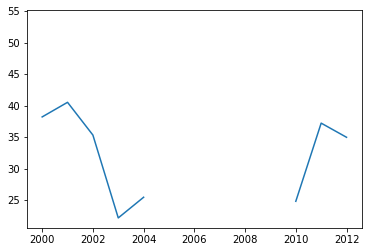

In [50]:
tdf.loc[("UGA", "SE.PRM.PRSL.ZS")].plot.line()